{'Rat\n': 2, 'Ox\n': 1, 'Pig\n': 2, 'Dragon\n': 2, 'Tiger\n': 1}
{'Rat\n': 2, 'Ox\n': 1, 'Pig\n': 2, 'Dragon\n': 2, 'Tiger\n': 1}
Bam
What year were you born: 1976
You are a  Dragon

Dragon

{'Rat\n': 2, 'Ox\n': 1, 'Pig\n': 2, 'Dragon\n': 2, 'Tiger\n': 1}


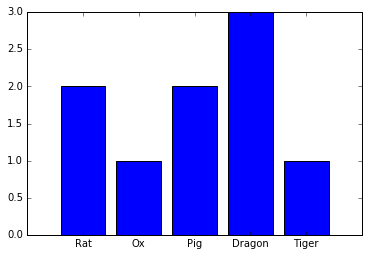

Bam
What year were you born: 1975
You are a  Rabbit

Rabbit

{'Rat\n': 2, 'Ox\n': 1, 'Pig\n': 2, 'Dragon\n': 3, 'Tiger\n': 1}


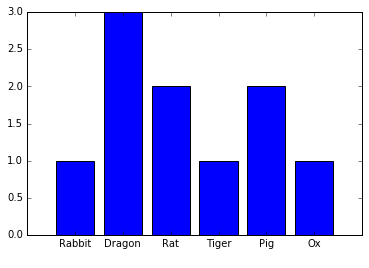

Bam


In [ ]:
# Now we'll set up the repeat by creating functions and a while loop

#Imports
import os.path
import json
# import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline #special iPython command to stop charts from opening in a new window.

# this function loads the descriptions and returns the content
def loadDesc():
    #Open the zodiac file
    zodiacText = open('zodiacDescriptions.txt')
    #for line in zodiacText:
    #    print(line)

    #Load into a list
    zodiacList = []
    for line in zodiacText:
        zodiacList.append(line)

    #print(zodiacList)

    zodiacText.close()
    
    return zodiacList

# this function loads the counts and returns their values
def loadCounts():
    # check if a file with the right name exists
    # if it does then open the file with the counts of zodiac characters (read-only) and initialize a dictionary with its JSON contents
    # close the file
    # if it doesn't then initialize the dictionary from scratch. No need to specify members.  We'll add them as they come up.

    if os.path.exists('.zodiacCounts.json'):
        #counts = {}
        with open('.zodiacCounts.json','r') as infile:
            counts = json.load(infile)
    else:
        counts = {}
    
    print(counts)
    return counts

# this function carries out the core work of the program
def core(birthYear, counts, zodiacList):
    #Ask user for input (year)
    try:
        birthYear=int(input('What year were you born: '))
        listIndex = (birthYear - 4) % 12
        #print(listIndex)

        #Return character
        print("You are a ", zodiacList[listIndex])

        # INCREMENT CHARACTER VALUE IN DICTIONARY
        # Check if character is in dictionary
        # Add if it isn't
        # Increment if it is
        print(zodiacList[listIndex])
        print(counts)
        if zodiacList[listIndex] in counts:
            counts[zodiacList[listIndex]] += 1
        else:
            counts[zodiacList[listIndex]] = 1

        # Print the current version of the chart
        plt.bar(range(len(counts)), counts.values(), align='center')
        plt.xticks(range(len(counts)), list(counts.keys()))

        plt.show()
        
        return (birthYear, counts)

    except ValueError:
        print("You did not enter a number")
        
        return ("fail", counts)

#Repeat
zodiacList = loadDesc()
counts = loadCounts()

birthYear = 0

print(counts)
while type(birthYear) is int:
    birthYear, counts = core(birthYear, counts, zodiacList) 

# Open file if it exists or create it 
# Write Dictionary to JSON
# print(counts)
with open('.zodiacCounts.json', 'w') as outfile:
    json.dump(counts, outfile)